# U-Net Model

# 1. Import All Necessary Libraries and Create File Paths

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import random

# Plotting
import matplotlib.pyplot as plt

# Modelling CNN|
import tensorflow as tf
import tensorflow_addons as tfa
import glob
import math
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
import albumentations as A
from tqdm import tqdm
import math
import datetime
from keras import backend as K

In [2]:
# folder path or file path constants that will be used in this project
# Root Directory (between 'F:' or 'D:'' depends on the external drive)
ROOT = "D:"

# Folder inside D:\\wildfire-sumatera-dataset
WILDFIRE_SUMATERA_DATASET_FOLDER_PATH = os.path.join(ROOT, 'wildfire-sumatera-dataset')


# Folders and metadatas inside D:\\wildfire-sumatera-dataset
WILDFIRE_SUMATERA_GEOTIFF_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_DATASET_FOLDER_PATH, 'wildfire-sumatera-geotiff')
WILDFIRE_SUMATERA_IMAGE_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_DATASET_FOLDER_PATH, 'wildfire-sumatera-image')
WILDFIRE_SUMATERA_IMAGE_MASK_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_DATASET_FOLDER_PATH, 'wildfire-sumatera-image-mask')
WILDFIRE_SUMATERA_IMAGE_MASK_TFRECORD_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_DATASET_FOLDER_PATH, 'wildfire-sumatera-image-mask-tfrecords')

# Files (.csv) and metadatas inside D:\\wildfire-sumatera-dataset
METADATA_LANDSAT_8_FILE_PATH = os.path.join(WILDFIRE_SUMATERA_DATASET_FOLDER_PATH, 'metadata_landsat_8.csv')
METADATA_SENTINEL_2_FILE_PATH = os.path.join(WILDFIRE_SUMATERA_DATASET_FOLDER_PATH, 'metadata_sentinel_2.csv')

# Folders inside D:\\wildfire-sumatera-dataset\\wildfire-sumatera-geotiff
SENTINEL_2_GEOTIFF_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_GEOTIFF_FOLDER_PATH, 'sentinel-2')
LANDSAT_8_GEOTIFF_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_GEOTIFF_FOLDER_PATH, 'landsat-8')

# Folders inside D:\\wildfire-sumatera-dataset\\wildfire-sumatera-image
SENTINEL_2_IMAGE_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_IMAGE_FOLDER_PATH, 'sentinel-2')
LANDSAT_8_IMAGE_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_IMAGE_FOLDER_PATH, 'landsat-8')

# Folders inside D:\\wildfire-sumatera-dataset\\wildfire-sumatera-geotiff\\landsat-8
LANDSAT_8_PREFIRE_GEOTIFF_FOLDER_PATH = os.path.join(LANDSAT_8_GEOTIFF_FOLDER_PATH, 'prefire')
LANDSAT_8_POSTFIRE_GEOTIFF_FOLDER_PATH = os.path.join(LANDSAT_8_GEOTIFF_FOLDER_PATH, 'postfire')

# Folders inside D:\\wildfire-sumatera-dataset\\wildfire-sumatera-geotiff\\sentinel-2
SENTINEL_2_PREFIRE_GEOTIFF_FOLDER_PATH = os.path.join(SENTINEL_2_GEOTIFF_FOLDER_PATH, 'prefire')
SENTINEL_2_POSTFIRE_GEOTIFF_FOLDER_PATH = os.path.join(SENTINEL_2_GEOTIFF_FOLDER_PATH, 'postfire')

# Folders inside D:\\wildfire-sumatera-dataset\\wildfire-sumatera-image-mask
SENTINEL_2_IMAGE_MASK_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_IMAGE_MASK_FOLDER_PATH, 'sentinel-2')
LANDSAT_8_IMAGE_MASK_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_IMAGE_MASK_FOLDER_PATH, 'landsat-8')

# Folders inside
SENTINEL_2_IMAGE_MASK_TFRECORD_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_IMAGE_MASK_TFRECORD_FOLDER_PATH, 'sentinel-2')
LANDSAT_8_IMAGE_MASK_TFRECORD_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_IMAGE_MASK_TFRECORD_FOLDER_PATH, 'landsat-8')

dirs = [
    WILDFIRE_SUMATERA_DATASET_FOLDER_PATH,
    WILDFIRE_SUMATERA_GEOTIFF_FOLDER_PATH, 
    WILDFIRE_SUMATERA_IMAGE_FOLDER_PATH,
    WILDFIRE_SUMATERA_IMAGE_MASK_FOLDER_PATH,
    WILDFIRE_SUMATERA_IMAGE_MASK_TFRECORD_FOLDER_PATH,
    
    SENTINEL_2_GEOTIFF_FOLDER_PATH, 
    LANDSAT_8_GEOTIFF_FOLDER_PATH,
    SENTINEL_2_IMAGE_FOLDER_PATH,
    LANDSAT_8_IMAGE_FOLDER_PATH,
    
    LANDSAT_8_PREFIRE_GEOTIFF_FOLDER_PATH,
    LANDSAT_8_POSTFIRE_GEOTIFF_FOLDER_PATH,
    SENTINEL_2_PREFIRE_GEOTIFF_FOLDER_PATH,
    SENTINEL_2_POSTFIRE_GEOTIFF_FOLDER_PATH,
    
    SENTINEL_2_IMAGE_MASK_FOLDER_PATH,
    LANDSAT_8_IMAGE_MASK_FOLDER_PATH,
    
    SENTINEL_2_IMAGE_MASK_TFRECORD_FOLDER_PATH,
    LANDSAT_8_IMAGE_MASK_TFRECORD_FOLDER_PATH,
]

for dir_ in dirs:
    if not os.path.exists(dir_):
        os.mkdir(dir_)
        print(f"{dir_} has been created")
    else:
        print(f"{dir_} already exist")

D:wildfire-sumatera-dataset already exist
D:wildfire-sumatera-dataset\wildfire-sumatera-geotiff already exist
D:wildfire-sumatera-dataset\wildfire-sumatera-image already exist
D:wildfire-sumatera-dataset\wildfire-sumatera-image-mask already exist
D:wildfire-sumatera-dataset\wildfire-sumatera-image-mask-tfrecords already exist
D:wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2 already exist
D:wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8 already exist
D:wildfire-sumatera-dataset\wildfire-sumatera-image\sentinel-2 already exist
D:wildfire-sumatera-dataset\wildfire-sumatera-image\landsat-8 already exist
D:wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\prefire already exist
D:wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire already exist
D:wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\prefire already exist
D:wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire already exist
D:wildfire-sum

# 2. Constants


In [3]:
RANDOM_STATE = 42
BATCH_SIZE = 64
SEED = RANDOM_STATE
WIDTH = 144
HEIGHT = 144
CHANNEL = 3
INPUT_SHAPE = (HEIGHT, WIDTH, CHANNEL)
LEARNING_RATE = 0.001
OPTIMIZER_NAME = 'adam'
AUTOTUNE = tf.data.experimental.AUTOTUNE
STARTING_FILTER = 32

# 3. Prepare Data

In [4]:
def parse_tfrecord_fn(example):
    """
    :param example: A scalar string Tensor (a single serialized example)
    :return: image and mask data in Tensor form
    """
    feature_description = {
        "image": tf.io.FixedLenFeature([], tf.string),
        "mask": tf.io.FixedLenFeature([], tf.string),
        "height": tf.io.FixedLenFeature([], tf.int64),
        "width": tf.io.FixedLenFeature([], tf.int64),
        "label": tf.io.FixedLenFeature([], tf.int64),
    }
    example = tf.io.parse_single_example(example, feature_description)
    
    example["image"] = tf.io.decode_png(example["image"])
    img_arr = tf.reshape(example["image"], (example["height"], example["width"], CHANNEL))
    example["mask"] = tf.io.decode_png(example["mask"])
    mask = tf.reshape(example["mask"], (example["height"], example["width"], 1))
    
    return example["image"], example["mask"], example["label"] 

In [5]:
def set_shapes(image, mask):
    """
    :param image: image in Tensor form
    :param mask: mask in Tensor form
    :return: reshaped image and mask data in Tensor form
    """
    image.set_shape(INPUT_SHAPE)
    mask.set_shape((WIDTH, HEIGHT, 1))
    return image, mask

def normalize_image_mask(image, mask):
    """
    :param image: image in Tensor form
    :param mask: mask in Tensor form
    :return: normalized image and mask data in Tensor form
    """
    image = image/255
    mask = mask/255
    return tf.cast(image, tf.dtypes.float32), tf.cast(mask, tf.dtypes.uint8)

def resize_image_mask(image, mask):
    """
    :param image: image in Tensor form
    :param mask: mask in Tensor form
    :return: resized image and mask data in Tensor form
    """
    image = tf.image.resize(image, (WIDTH, HEIGHT), method='nearest')
    mask = tf.image.resize(mask, (WIDTH, HEIGHT), method='nearest')
    return image, mask

augmentation = A.Compose([    
    A.ShiftScaleRotate(shift_limit=[-0.2, 0.2], 
                       scale_limit=[-0.2, 0.2], 
                       rotate_limit=[-90, 90]),
    A.OneOf([
        A.ElasticTransform(p=0.7),
        A.GridDistortion(p=0.7),
        A.OpticalDistortion(p=0.7)                  
    ]),
])

    
def augment_func(image, mask):
    """
    :param image: image in Tensor form
    :param mask: mask in Tensor form
    :return: augmented image and mask data in Tensor form
    """
    # resize image and mask
    image, mask = resize_image_mask(image, mask)
    
    # augmentation
    data = {"image": image.numpy(), 'mask': mask.numpy()}
    aug_data = augmentation(**data)
    aug_image, aug_mask = aug_data["image"], aug_data["mask"]
    
    # normalize image and mask
    aug_image, aug_mask = normalize_image_mask(aug_image, aug_mask)
    return aug_image, aug_mask

def process_data(image, mask):
    """
    :param image: image in Tensor form
    :param mask: mask in Tensor form
    :return: augmented image and mask data in Tensor form
    
    **info: this function is just a bridge for data augmentation because in order
    to do an image augmentation usiing Albumentation, requires a tf.numpy_function.
    """
    aug_image, aug_mask = tf.numpy_function(
        func=augment_func, 
        inp=[image, mask],
        Tout=[tf.float32, tf.uint8],
    )
    return aug_image, aug_mask

## 3.1 Using All Data

In [6]:
# return list of tfrecords using glob
files = glob.glob(os.path.join(SENTINEL_2_IMAGE_MASK_TFRECORD_FOLDER_PATH, '*.tfrec'), recursive=False)

# shuffled the filse using random sample 
random.seed(SEED)
shuffled_files = random.sample(files, len(files))

# split the shuffled file for train, validation, test
len_dataset = len(shuffled_files)

train_size = math.floor(0.8 * len_dataset)
validation_size = math.ceil(0.1 * len_dataset)
test_size = math.ceil(0.1 * len_dataset)

train_files = shuffled_files[:train_size]
validation_files = shuffled_files[train_size:train_size+validation_size]
test_files = shuffled_files[train_size+validation_size:]

# return a dataset consists of multiple files
parsed_train_dataset = tf.data.TFRecordDataset(train_files, num_parallel_reads=AUTOTUNE).map(parse_tfrecord_fn)
parsed_validation_dataset = tf.data.TFRecordDataset(validation_files, num_parallel_reads=AUTOTUNE).map(parse_tfrecord_fn)
parsed_test_dataset = tf.data.TFRecordDataset(test_files, num_parallel_reads=AUTOTUNE).map(parse_tfrecord_fn)

In [7]:
# get all images and masks
# image augmentation, resizing and normalization on the train dataset
train_dataset = parsed_train_dataset.map(lambda image, mask, _: process_data(image, mask), 
                                         num_parallel_calls=tf.data.experimental.AUTOTUNE).cache()

train_dataset = train_dataset.map(set_shapes, num_parallel_calls=tf.data.experimental.AUTOTUNE) \
                .shuffle(1000) \
                .batch(BATCH_SIZE) \
                .prefetch(tf.data.experimental.AUTOTUNE)

# resizing and normalization on the validation dataset
validation_dataset = parsed_validation_dataset.map(lambda image, mask, _: resize_image_mask(image, mask), 
                                                   num_parallel_calls=tf.data.experimental.AUTOTUNE).cache()
validation_dataset = validation_dataset.map(normalize_image_mask, num_parallel_calls=tf.data.experimental.AUTOTUNE).cache()
validation_dataset = validation_dataset.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

# resizing and normalization on the test dataset
test_dataset = parsed_test_dataset.map(lambda image, mask, _: resize_image_mask(image, mask), 
                                       num_parallel_calls=tf.data.experimental.AUTOTUNE).cache()
test_dataset = test_dataset.map(normalize_image_mask, num_parallel_calls=tf.data.experimental.AUTOTUNE).cache()
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

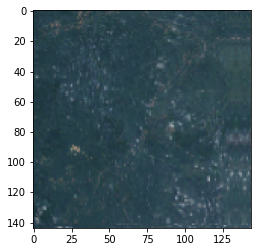

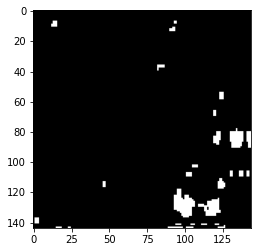

In [8]:
for d in train_dataset.take(1):
    image = d[0][0].numpy()
    mask = d[1][0].numpy()
    plt.imshow(image*3)
    plt.show()
    plt.imshow(mask, cmap='gray')
    plt.show()

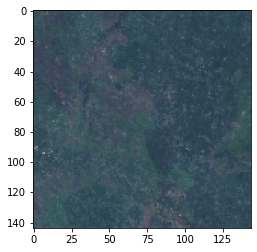

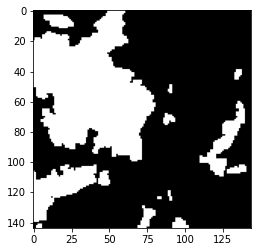

In [9]:
for d in validation_dataset.take(1):
    image = d[0][0].numpy()
    mask = d[1][0].numpy()
    plt.imshow(image*3)
    plt.show()
    plt.imshow(mask, cmap='gray')
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


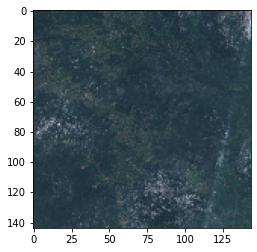

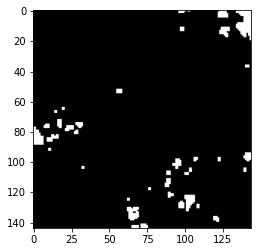

In [10]:
for d in test_dataset.take(1):
    image = d[0][0].numpy()
    mask = d[1][0].numpy()
    plt.imshow(image*3)
    plt.show()
    plt.imshow(mask, cmap='gray')
    plt.show()

## 3.2 Using All Data with Label  = 1

In [6]:
# return list of tfrecords using glob
files = glob.glob(os.path.join(LANDSAT_8_IMAGE_MASK_TFRECORD_FOLDER_PATH, '*.tfrec'), recursive=False)

# shuffled the filse using random sample 
random.seed(SEED)
shuffled_files = random.sample(files, len(files))

# split the shuffled file for train, validation, test
len_dataset = len(shuffled_files)

train_size = math.floor(0.8 * len_dataset)
validation_size = math.ceil(0.1 * len_dataset)
test_size = math.ceil(0.1 * len_dataset)

train_files = shuffled_files[:train_size]
validation_files = shuffled_files[train_size:train_size+validation_size]
test_files = shuffled_files[train_size+validation_size:]

# return a dataset consists of multiple files
parsed_filtered_train_dataset = tf.data.TFRecordDataset(train_files).map(parse_tfrecord_fn).filter(lambda image, mask, label: label > 0)
parsed_filtered_validation_dataset = tf.data.TFRecordDataset(validation_files).map(parse_tfrecord_fn).filter(lambda image, mask, label: label > 0)
parsed_filtered_test_dataset = tf.data.TFRecordDataset(test_files).map(parse_tfrecord_fn).filter(lambda image, mask, label: label > 0)

In [7]:
# get all images and masks
# image augmentation, resizing and normalization on the train dataset
train_dataset = parsed_filtered_train_dataset.map(lambda image, mask, _: process_data(image, mask), 
                                         num_parallel_calls=tf.data.experimental.AUTOTUNE).cache()

train_dataset = train_dataset.map(set_shapes, num_parallel_calls=tf.data.experimental.AUTOTUNE) \
                .shuffle(1000) \
                .batch(BATCH_SIZE) \
                .prefetch(tf.data.experimental.AUTOTUNE)

# resizing and normalization on the validation dataset
validation_dataset = parsed_filtered_validation_dataset.map(lambda image, mask, _: resize_image_mask(image, mask), 
                                                   num_parallel_calls=tf.data.experimental.AUTOTUNE).cache()
validation_dataset = validation_dataset.map(normalize_image_mask, num_parallel_calls=tf.data.experimental.AUTOTUNE).cache()
validation_dataset = validation_dataset.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

# resizing and normalization on the test dataset
test_dataset = parsed_filtered_test_dataset.map(lambda image, mask, _: resize_image_mask(image, mask), 
                                       num_parallel_calls=tf.data.experimental.AUTOTUNE).cache()
test_dataset = test_dataset.map(normalize_image_mask, num_parallel_calls=tf.data.experimental.AUTOTUNE).cache()
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

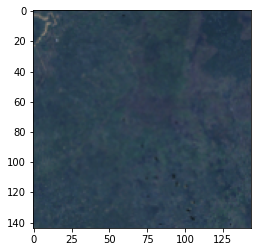

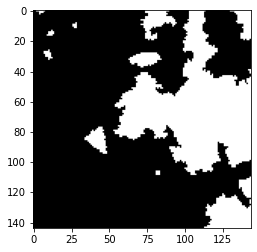

In [8]:
for d in train_dataset.take(1):
    image = d[0][0].numpy()
    mask = d[1][0].numpy()
    plt.imshow(image*3)
    plt.show()
    plt.imshow(mask, cmap='gray')
    plt.show()

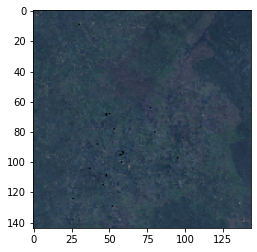

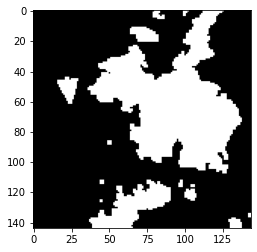

In [9]:
for d in validation_dataset.take(1):
    image = d[0][0].numpy()
    mask = d[1][0].numpy()
    plt.imshow(image*3)
    plt.show()
    plt.imshow(mask, cmap='gray')
    plt.show()

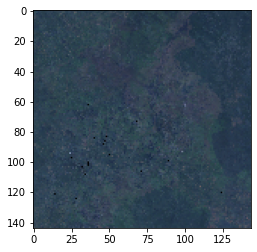

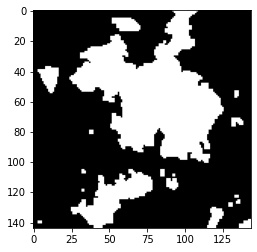

In [10]:
for d in test_dataset.take(1):
    image = d[0][0].numpy()
    mask = d[1][0].numpy()
    plt.imshow(image*3)
    plt.show()
    plt.imshow(mask, cmap='gray')
    plt.show()

# 3. Get U-Net Model

<p align="center">
    <img src="images/u-net-architecture.png" alt="U-Net Architecture">
</p>

In [11]:
import models.unet_model as unet

unet_model_original = unet.get_model(
    input_shape=INPUT_SHAPE,
    starting_filter=STARTING_FILTER,
)
display(unet_model_original.summary())

Model: "unet-model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 144, 144, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 144, 144, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 144, 144, 32  9248        ['conv2d[0][0]']                 
                                )                                                        

 concatenate_3 (Concatenate)    (None, 144, 144, 64  0           ['conv2d_transpose_3[0][0]',     
                                )                                 'conv2d_1[0][0]']               
                                                                                                  
 dropout_7 (Dropout)            (None, 144, 144, 64  0           ['concatenate_3[0][0]']          
                                )                                                                 
                                                                                                  
 conv2d_16 (Conv2D)             (None, 144, 144, 32  18464       ['dropout_7[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_17 (Conv2D)             (None, 144, 144, 32  9248        ['conv2d_16[0][0]']              
          

None

# 4. Prepare metrics

In [12]:
def dice_coef(y_true, y_pred):
    """
    :param y_true: tensors contain ground truth values
    :param y_pred: tensors contain predicted values
    :return: dice coefficient value
    """
    X = tf.cast(K.flatten(y_true), tf.dtypes.float32)
    Y = tf.cast(K.flatten(y_pred), tf.dtypes.float32)
    intersection = K.sum(X * Y)
    return 2 * intersection/ (K.sum(X) + K.sum(Y))

def jaccard_coef(y_true, y_pred):
    """
    :param y_true: tensors contain ground truth values
    :param y_pred: tensors contain predicted values
    :return: jaccard coefficient value
    """
    X = tf.cast(K.flatten(y_true), tf.dtypes.float32)
    Y = tf.cast(K.flatten(y_pred), tf.dtypes.float32)
    intersection = K.sum(X * Y)
    union = K.sum(X) + K.sum(Y) - intersection
    return intersection/ union

# 4. Compile Model
Using:
1. Loss Function : Binary Cross Entropy
2. Metrics : Binary Accuracy (Accuracy), Dice Coefficient, Binary Intersection over Union (BinaryIoU)


In [13]:
RANDOM_STATE = 42
BATCH_SIZE = 64
SEED = RANDOM_STATE
WIDTH = 144
HEIGHT = 144
CHANNEL = 3
INPUT_SHAPE = (HEIGHT, WIDTH, CHANNEL)
LEARNING_RATE = 0.001
OPTIMIZER_NAME = 'rmsprop'
AUTOTUNE = tf.data.experimental.AUTOTUNE
STARTING_FILTER = 32

## 4.1 Train Using All Data

In [14]:
# Compile Model
unet_model = tf.keras.models.clone_model(unet_model_original)

if OPTIMIZER_NAME == 'adam':
    unet_model.compile(
        loss='binary_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
        metrics=['accuracy', dice_coef, tf.keras.metrics.BinaryIoU(target_class_ids=[0, 1], threshold=0.5, name="binary_iou")]
    )
elif OPTIMIZER_NAME == 'rmsprop':
    unet_model.compile(
        loss='binary_crossentropy',
        optimizer=tf.keras.optimizers.RMSprop(learning_rate=LEARNING_RATE),
        metrics=['accuracy', dice_coef, tf.keras.metrics.BinaryIoU(target_class_ids=[0, 1], threshold=0.5, name="binary_iou")]
    )


date = datetime.datetime.now().strftime("%Y%m%d")
epochs=20

model_path = "models/sentinel_2/unet_model_opt_{}_lr_{}_batch_{}_epochs_{}_filters_{}_size_{}_date_{}". \
          format(OPTIMIZER_NAME, LEARNING_RATE, BATCH_SIZE, epochs, STARTING_FILTER, INPUT_SHAPE[0], date)

log_dir = "logs/fit/sentinel_2/unet_model_opt_{}_lr_{}_batch_{}_epochs_{}_filters_{}_size_{}_date_{}". \
          format(OPTIMIZER_NAME, LEARNING_RATE, BATCH_SIZE, epochs, STARTING_FILTER, INPUT_SHAPE[0], date)

callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 2),
    tf.keras.callbacks.ModelCheckpoint(
        filepath = model_path, 
        monitor = 'val_dice_coef', 
        save_best_only = True,
        mode = 'max', 
        verbose = 2,
    ),
    tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1),
]

history = unet_model.fit(
    train_dataset,
    epochs=epochs,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/20
     98/Unknown - 129s 1s/step - loss: 0.4563 - accuracy: 0.8382 - dice_coef: 0.1732 - binary_iou: 0.4264   
Epoch 1: val_dice_coef improved from -inf to 0.18486, saving model to models/sentinel_2\unet_model_opt_rmsprop_lr_0.001_batch_64_epochs_20_filters_32_size_144_date_20220812


INFO:tensorflow:Assets written to: models/sentinel_2\unet_model_opt_rmsprop_lr_0.001_batch_64_epochs_20_filters_32_size_144_date_20220812\assets


INFO:tensorflow:Assets written to: models/sentinel_2\unet_model_opt_rmsprop_lr_0.001_batch_64_epochs_20_filters_32_size_144_date_20220812\assets


98/98 [==============================] - 142s 1s/step - loss: 0.4563 - accuracy: 0.8382 - dice_coef: 0.1732 - binary_iou: 0.4264 - val_loss: 0.3782 - val_accuracy: 0.8540 - val_dice_coef: 0.1849 - val_binary_iou: 0.4270
Epoch 2/20
98/98 [==============================] - ETA: 0s - loss: 0.3886 - accuracy: 0.8491 - dice_coef: 0.2145 - binary_iou: 0.4280
Epoch 2: val_dice_coef improved from 0.18486 to 0.22037, saving model to models/sentinel_2\unet_model_opt_rmsprop_lr_0.001_batch_64_epochs_20_filters_32_size_144_date_20220812


INFO:tensorflow:Assets written to: models/sentinel_2\unet_model_opt_rmsprop_lr_0.001_batch_64_epochs_20_filters_32_size_144_date_20220812\assets


INFO:tensorflow:Assets written to: models/sentinel_2\unet_model_opt_rmsprop_lr_0.001_batch_64_epochs_20_filters_32_size_144_date_20220812\assets


98/98 [==============================] - 56s 567ms/step - loss: 0.3886 - accuracy: 0.8491 - dice_coef: 0.2145 - binary_iou: 0.4280 - val_loss: 0.3624 - val_accuracy: 0.8540 - val_dice_coef: 0.2204 - val_binary_iou: 0.4270
Epoch 3/20
98/98 [==============================] - ETA: 0s - loss: 0.4272 - accuracy: 0.8442 - dice_coef: 0.2342 - binary_iou: 0.4370
Epoch 3: val_dice_coef improved from 0.22037 to 0.24028, saving model to models/sentinel_2\unet_model_opt_rmsprop_lr_0.001_batch_64_epochs_20_filters_32_size_144_date_20220812


INFO:tensorflow:Assets written to: models/sentinel_2\unet_model_opt_rmsprop_lr_0.001_batch_64_epochs_20_filters_32_size_144_date_20220812\assets


INFO:tensorflow:Assets written to: models/sentinel_2\unet_model_opt_rmsprop_lr_0.001_batch_64_epochs_20_filters_32_size_144_date_20220812\assets


98/98 [==============================] - 56s 569ms/step - loss: 0.4272 - accuracy: 0.8442 - dice_coef: 0.2342 - binary_iou: 0.4370 - val_loss: 0.3541 - val_accuracy: 0.8540 - val_dice_coef: 0.2403 - val_binary_iou: 0.4270
Epoch 4/20
98/98 [==============================] - ETA: 0s - loss: 0.3676 - accuracy: 0.8536 - dice_coef: 0.2532 - binary_iou: 0.4574
Epoch 4: val_dice_coef improved from 0.24028 to 0.31529, saving model to models/sentinel_2\unet_model_opt_rmsprop_lr_0.001_batch_64_epochs_20_filters_32_size_144_date_20220812


INFO:tensorflow:Assets written to: models/sentinel_2\unet_model_opt_rmsprop_lr_0.001_batch_64_epochs_20_filters_32_size_144_date_20220812\assets


INFO:tensorflow:Assets written to: models/sentinel_2\unet_model_opt_rmsprop_lr_0.001_batch_64_epochs_20_filters_32_size_144_date_20220812\assets


98/98 [==============================] - 56s 569ms/step - loss: 0.3676 - accuracy: 0.8536 - dice_coef: 0.2532 - binary_iou: 0.4574 - val_loss: 0.3347 - val_accuracy: 0.8706 - val_dice_coef: 0.3153 - val_binary_iou: 0.5400
Epoch 5/20
98/98 [==============================] - ETA: 0s - loss: 0.3911 - accuracy: 0.8459 - dice_coef: 0.2452 - binary_iou: 0.4627
Epoch 5: val_dice_coef did not improve from 0.31529
98/98 [==============================] - 52s 533ms/step - loss: 0.3911 - accuracy: 0.8459 - dice_coef: 0.2452 - binary_iou: 0.4627 - val_loss: 0.3774 - val_accuracy: 0.8574 - val_dice_coef: 0.2480 - val_binary_iou: 0.4407
Epoch 6/20
98/98 [==============================] - ETA: 0s - loss: 0.3734 - accuracy: 0.8569 - dice_coef: 0.2688 - binary_iou: 0.4839
Epoch 6: val_dice_coef did not improve from 0.31529
98/98 [==============================] - 52s 533ms/step - loss: 0.3734 - accuracy: 0.8569 - dice_coef: 0.2688 - binary_iou: 0.4839 - val_loss: 0.3430 - val_accuracy: 0.8580 - val_dic

INFO:tensorflow:Assets written to: models/sentinel_2\unet_model_opt_rmsprop_lr_0.001_batch_64_epochs_20_filters_32_size_144_date_20220812\assets


INFO:tensorflow:Assets written to: models/sentinel_2\unet_model_opt_rmsprop_lr_0.001_batch_64_epochs_20_filters_32_size_144_date_20220812\assets


98/98 [==============================] - 56s 569ms/step - loss: 0.3774 - accuracy: 0.8524 - dice_coef: 0.2740 - binary_iou: 0.4871 - val_loss: 0.3252 - val_accuracy: 0.8686 - val_dice_coef: 0.3491 - val_binary_iou: 0.5601
Epoch 8/20
98/98 [==============================] - ETA: 0s - loss: 0.3586 - accuracy: 0.8548 - dice_coef: 0.2759 - binary_iou: 0.4793
Epoch 8: val_dice_coef did not improve from 0.34913
98/98 [==============================] - 52s 531ms/step - loss: 0.3586 - accuracy: 0.8548 - dice_coef: 0.2759 - binary_iou: 0.4793 - val_loss: 0.3343 - val_accuracy: 0.8569 - val_dice_coef: 0.2599 - val_binary_iou: 0.4391
Epoch 9/20
82/98 [========================>.....] - ETA: 8s - loss: 0.3512 - accuracy: 0.8582 - dice_coef: 0.2888 - binary_iou: 0.4945

ResourceExhaustedError: Graph execution error:

Detected at node 'gradient_tape/unet-model/conv2d_16/Conv2D/Conv2DBackpropInput' defined at (most recent call last):
    File "C:\Users\USER\AppData\Local\Programs\Python\Python38\lib\runpy.py", line 192, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\USER\AppData\Local\Programs\Python\Python38\lib\runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "C:\Users\USER\.virtualenvs\sumatera-wildfire-classification-_WNpeDyZ\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\USER\.virtualenvs\sumatera-wildfire-classification-_WNpeDyZ\lib\site-packages\traitlets\config\application.py", line 976, in launch_instance
      app.start()
    File "C:\Users\USER\.virtualenvs\sumatera-wildfire-classification-_WNpeDyZ\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\USER\.virtualenvs\sumatera-wildfire-classification-_WNpeDyZ\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\USER\AppData\Local\Programs\Python\Python38\lib\asyncio\base_events.py", line 563, in run_forever
      self._run_once()
    File "C:\Users\USER\AppData\Local\Programs\Python\Python38\lib\asyncio\base_events.py", line 1844, in _run_once
      handle._run()
    File "C:\Users\USER\AppData\Local\Programs\Python\Python38\lib\asyncio\events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\USER\.virtualenvs\sumatera-wildfire-classification-_WNpeDyZ\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\USER\.virtualenvs\sumatera-wildfire-classification-_WNpeDyZ\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\USER\.virtualenvs\sumatera-wildfire-classification-_WNpeDyZ\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\USER\.virtualenvs\sumatera-wildfire-classification-_WNpeDyZ\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Users\USER\.virtualenvs\sumatera-wildfire-classification-_WNpeDyZ\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "C:\Users\USER\.virtualenvs\sumatera-wildfire-classification-_WNpeDyZ\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\USER\.virtualenvs\sumatera-wildfire-classification-_WNpeDyZ\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_cell
      result = self._run_cell(
    File "C:\Users\USER\.virtualenvs\sumatera-wildfire-classification-_WNpeDyZ\lib\site-packages\IPython\core\interactiveshell.py", line 2936, in _run_cell
      return runner(coro)
    File "C:\Users\USER\.virtualenvs\sumatera-wildfire-classification-_WNpeDyZ\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\USER\.virtualenvs\sumatera-wildfire-classification-_WNpeDyZ\lib\site-packages\IPython\core\interactiveshell.py", line 3135, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\USER\.virtualenvs\sumatera-wildfire-classification-_WNpeDyZ\lib\site-packages\IPython\core\interactiveshell.py", line 3338, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\USER\.virtualenvs\sumatera-wildfire-classification-_WNpeDyZ\lib\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\USER\AppData\Local\Temp\ipykernel_6052\2002591754.py", line 39, in <cell line: 39>
      history = unet_model.fit(
    File "C:\Users\USER\.virtualenvs\sumatera-wildfire-classification-_WNpeDyZ\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\USER\.virtualenvs\sumatera-wildfire-classification-_WNpeDyZ\lib\site-packages\keras\engine\training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\USER\.virtualenvs\sumatera-wildfire-classification-_WNpeDyZ\lib\site-packages\keras\engine\training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "C:\Users\USER\.virtualenvs\sumatera-wildfire-classification-_WNpeDyZ\lib\site-packages\keras\engine\training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\USER\.virtualenvs\sumatera-wildfire-classification-_WNpeDyZ\lib\site-packages\keras\engine\training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "C:\Users\USER\.virtualenvs\sumatera-wildfire-classification-_WNpeDyZ\lib\site-packages\keras\engine\training.py", line 893, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "C:\Users\USER\.virtualenvs\sumatera-wildfire-classification-_WNpeDyZ\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 537, in minimize
      grads_and_vars = self._compute_gradients(
    File "C:\Users\USER\.virtualenvs\sumatera-wildfire-classification-_WNpeDyZ\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 590, in _compute_gradients
      grads_and_vars = self._get_gradients(tape, loss, var_list, grad_loss)
    File "C:\Users\USER\.virtualenvs\sumatera-wildfire-classification-_WNpeDyZ\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 471, in _get_gradients
      grads = tape.gradient(loss, var_list, grad_loss)
Node: 'gradient_tape/unet-model/conv2d_16/Conv2D/Conv2DBackpropInput'
OOM when allocating tensor with shape[64,64,144,144] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node gradient_tape/unet-model/conv2d_16/Conv2D/Conv2DBackpropInput}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_23391]

In [ ]:
LEARNING_RATE = 0.01

In [ ]:
# Compile Model
unet_model = tf.keras.models.clone_model(unet_model_original)

if OPTIMIZER_NAME == 'adam':
    unet_model.compile(
        loss='binary_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
        metrics=['accuracy', dice_coef, tf.keras.metrics.BinaryIoU(target_class_ids=[0, 1], threshold=0.5, name="binary_iou")]
    )
elif OPTIMIZER_NAME == 'rmsprop':
    unet_model.compile(
        loss='binary_crossentropy',
        optimizer=tf.keras.optimizers.RMSprop(learning_rate=LEARNING_RATE),
        metrics=['accuracy', dice_coef, tf.keras.metrics.BinaryIoU(target_class_ids=[0, 1], threshold=0.5, name="binary_iou")]
    )


date = datetime.datetime.now().strftime("%Y%m%d")
epochs=20

model_path = "models/sentinel_2/unet_model_opt_{}_lr_{}_batch_{}_epochs_{}_filters_{}_size_{}_date_{}". \
          format(OPTIMIZER_NAME, LEARNING_RATE, BATCH_SIZE, epochs, STARTING_FILTER, INPUT_SHAPE[0], date)

log_dir = "logs/fit/sentinel_2/unet_model_opt_{}_lr_{}_batch_{}_epochs_{}_filters_{}_size_{}_date_{}". \
          format(OPTIMIZER_NAME, LEARNING_RATE, BATCH_SIZE, epochs, STARTING_FILTER, INPUT_SHAPE[0], date)

callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 2),
    tf.keras.callbacks.ModelCheckpoint(
        filepath = model_path, 
        monitor = 'val_dice_coef', 
        save_best_only = True,
        mode = 'max', 
        verbose = 2,
    ),
    tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1),
]

history = unet_model.fit(
    train_dataset,
    epochs=epochs,
    validation_data=validation_dataset,
    callbacks=callbacks
)

In [ ]:
%load_ext jupyternotify
%notify

## 4.1 Train All Data with Label = 1

In [1]:
# Compile Model
unet_model = tf.keras.models.clone_model(unet_model_original)

if OPTIMIZER_NAME == 'adam':
    unet_model.compile(
        loss='binary_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
        metrics=['accuracy', dice_coef, tf.keras.metrics.BinaryIoU(target_class_ids=[0, 1], threshold=0.5, name="binary_iou")]
    )
elif OPTIMIZER_NAME == 'rmsprop':
    unet_model.compile(
        loss='binary_crossentropy',
        optimizer=tf.keras.optimizers.RMSprop(learning_rate=LEARNING_RATE),
        metrics=['accuracy', dice_coef, tf.keras.metrics.BinaryIoU(target_class_ids=[0, 1], threshold=0.5, name="binary_iou")]
    )

date = datetime.datetime.now().strftime("%Y%m%d")
model_path = "filtered_data_unet_model_opt_{}_lr_{}_epoch_{}_shape_{}_date_{}". \
          format(learning_rate, starting_filter, INPUT_SHAPE[0], date)

epochs=10
log_dir = "logs/fit/filtered_data_unet_model_opt_{}_lr_{}_epoch_{}_shape_{}_date_{}". \
          format(learning_rate, starting_filter, INPUT_SHAPE[0], date)

print(log_dir)
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 2),
    tf.keras.callbacks.ModelCheckpoint(
        filepath = model_path, 
        monitor = 'val_dice_coef'.format(index), 
        save_best_only = True,
        mode = 'max', 
        verbose = 2,
    ),
    tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1),
]

history = unet_model.fit(
    train_dataset,
    epochs=epochs,
    validation_data=validation_dataset,
    callbacks=callbacks
)

NameError: name 'tf' is not defined

In [1]:
# launch TensorBoard
%load_ext tensorboard 
%tensorboard --logdir logs/

Reusing TensorBoard on port 6006 (pid 10552), started 1 day, 12:10:12 ago. (Use '!kill 10552' to kill it.)

# 5. Use Model On Test Data 

In [27]:
def dice_coef(y_true, y_pred):
    """
    :param y_true: tensors contain ground truth values
    :param y_pred: tensors contain predicted values
    :return: dice coefficient value
    """
    return 1


# load model
model_path = "models/unet_model_opt_rmsprop_lr_0.001_batch_32_epochs_20_filters_32_size_144_date_20220809"
unet_model = tf.keras.models.load_model(model_path, custom_objects={'dice_coef': dice_coef})

In [28]:
result = unet_model.predict(test_dataset)
np_result = np.array(result)
np_result = np.where(np_result<0.5, 0, 1)

25/25 [==============================] - 3s 90ms/step


In [29]:
def display_image_prediction(dataset, result_mask):
    for batch in dataset.take(1):
        n_rows = len(batch[0])
        n_cols = 3
        i = 0
        fig, axs = plt.subplots(n_rows, n_cols, figsize=(30, n_rows*10), sharey=True)
        for image, true_mask in zip(batch[0], batch[1]):
            image = tf.cast(image*255, tf.uint8)
            true_mask = tf.cast(true_mask*255, tf.uint8)
            predicted_mask = result_mask[i]
            axs[i, 0].imshow(image.numpy()*3)
            axs[i, 0].set_title('Image')
            axs[i, 1].imshow(true_mask.numpy())
            axs[i, 1].set_title('True Mask')
            axs[i, 2].imshow(predicted_mask)
            axs[i, 2].set_title('Predicted Mask')
            i+=1
        plt.show()

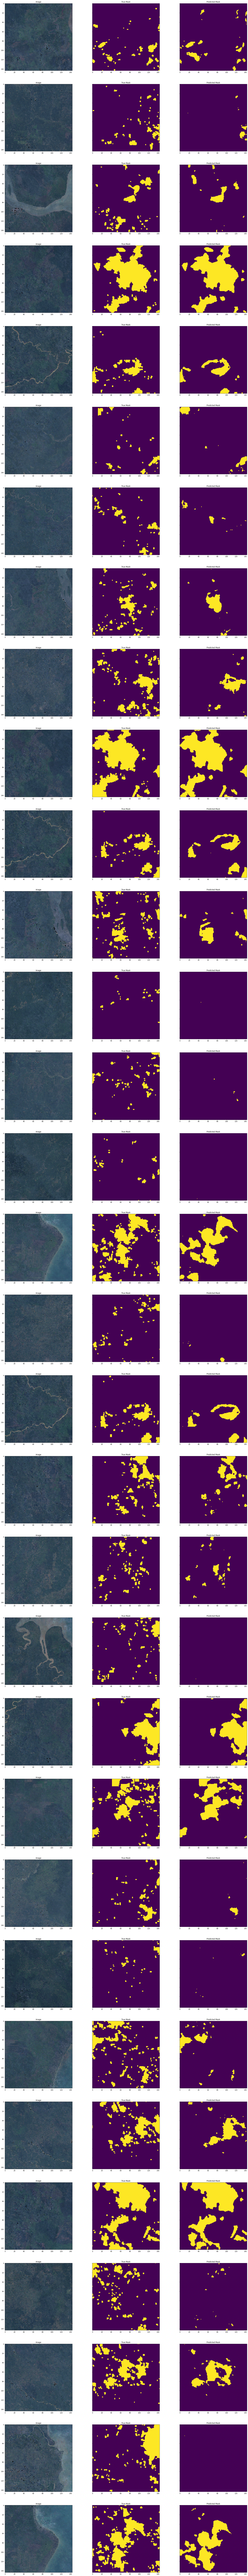

In [30]:
display_image_prediction(test_dataset, np_result)